#                                                     PART - I  
###                                                                       SIGNAL DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


In [88]:
file= 'C:\Users\meyya\OneDrive\AIML\Machine Learning\Neural Networks\Project\Signal.csv'
signal= pd.read_csv(file)
signal.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1473758279.py, line 1)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
null_data= (signal.isnull().sum()/len(signal))*100
print(null_data)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [5]:
    signal.shape

(1599, 12)

In [6]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Duplicates

duplicates= signal.duplicated().sum()
print(duplicates)

240


In [8]:
#dropping
signal.drop_duplicates(inplace= True)
signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='Signal_Strength', ylabel='Count'>

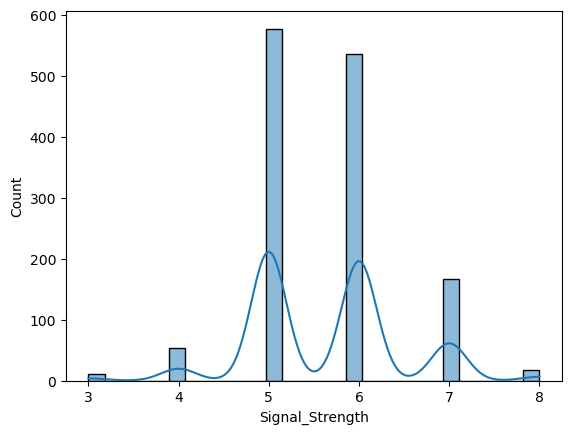

In [9]:
#distribution plot
sns.histplot(data= signal,x='Signal_Strength', kde=True)

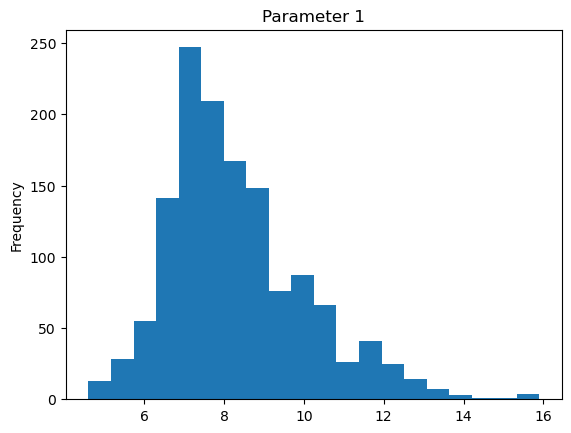

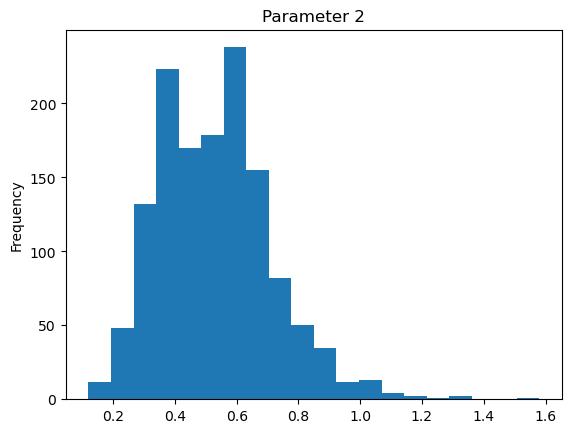

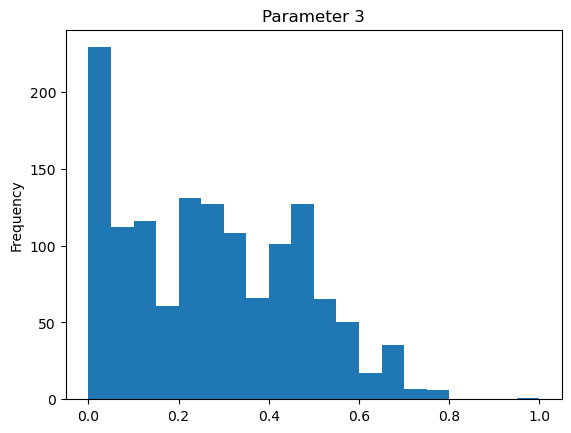

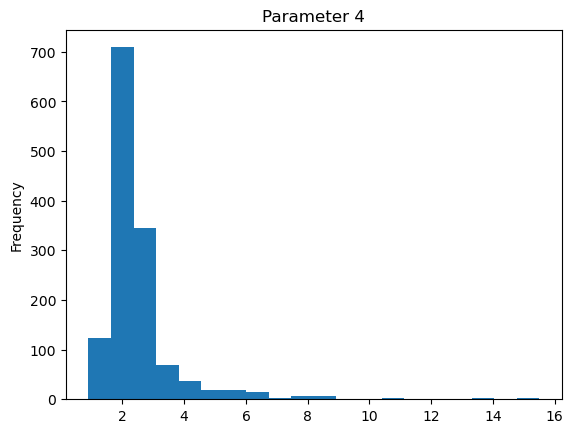

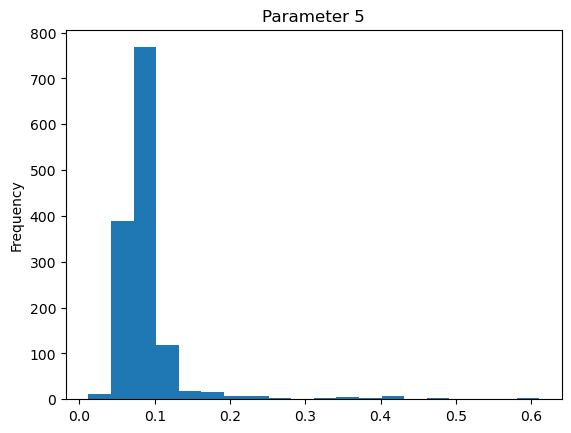

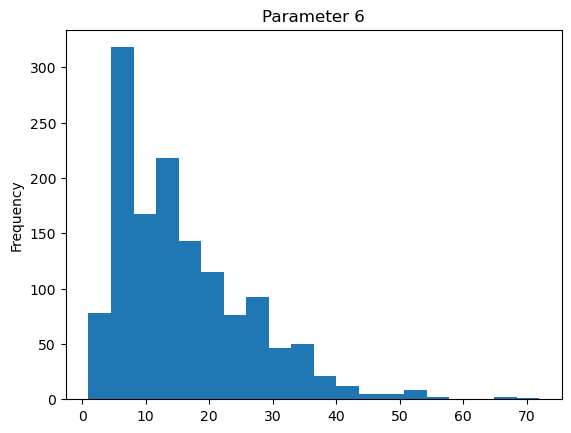

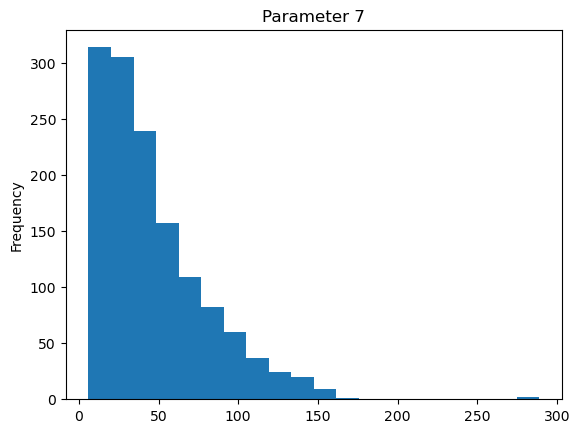

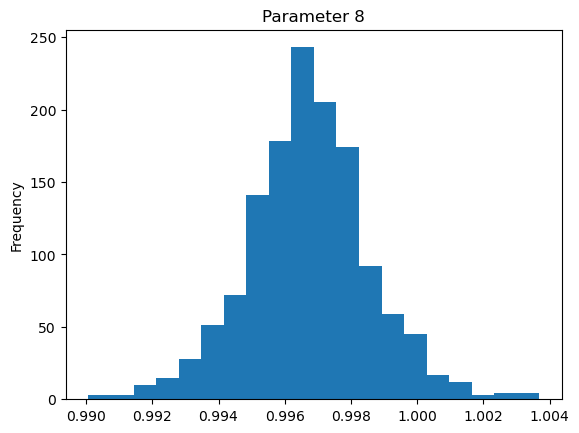

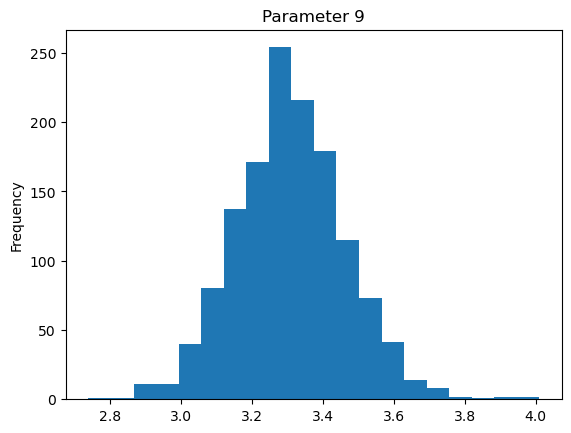

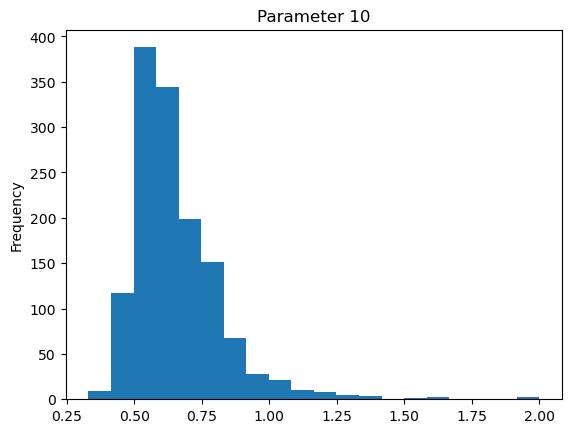

In [10]:
for column in signal.columns[0:10]:
  signal[column].plot(kind='hist', bins=20, title=column)
  plt.show()

<Axes: xlabel='Signal_Strength'>

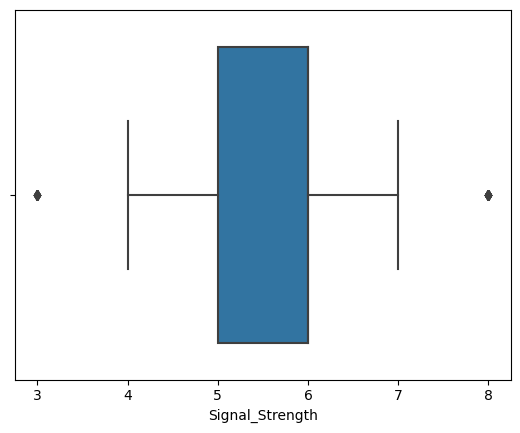

In [11]:
sns.boxplot(signal, x='Signal_Strength')

<Axes: >

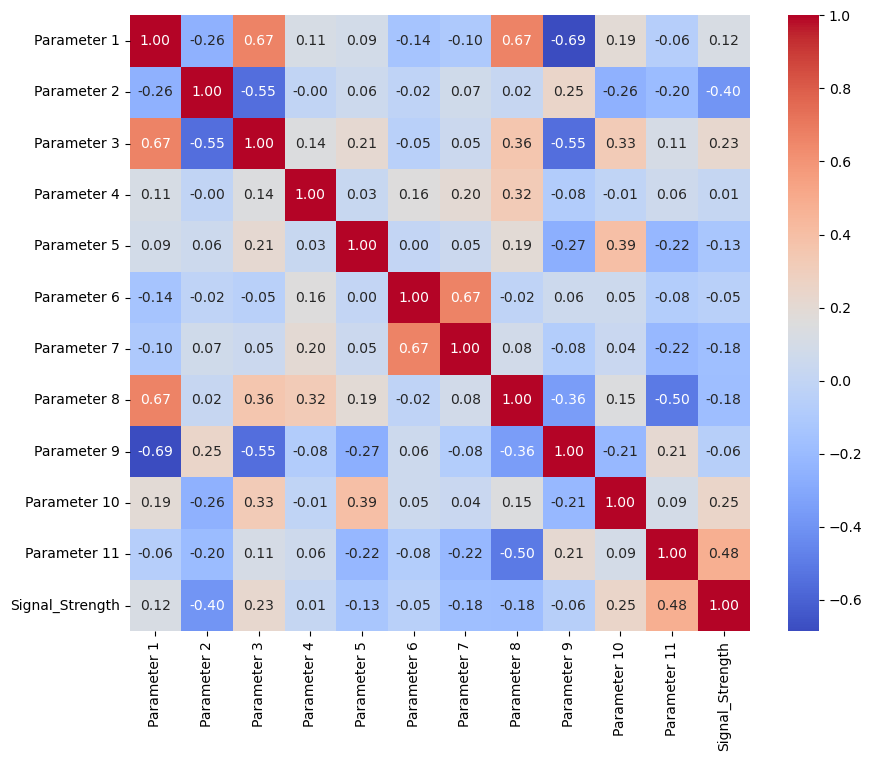

In [12]:
corr_matrix = signal.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [13]:
q1= signal['Signal_Strength'].quantile(0.25)
q3= signal['Signal_Strength'].quantile(0.75)
iqr= q3-q1
lower= q1-1.5*iqr
upper= q3+1.5*iqr

signal_strength_ol= ((signal['Signal_Strength'] < lower) | (signal['Signal_Strength']>upper))
percentage= (signal_strength_ol.sum()/len(signal['Signal_Strength']))
print(round(percentage,2),'%')

0.02 %


In [14]:
signal.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

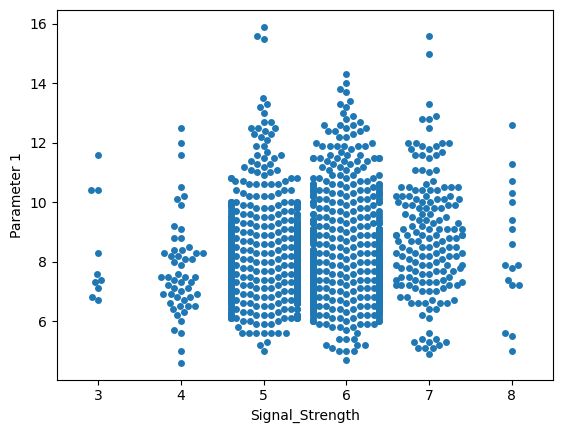

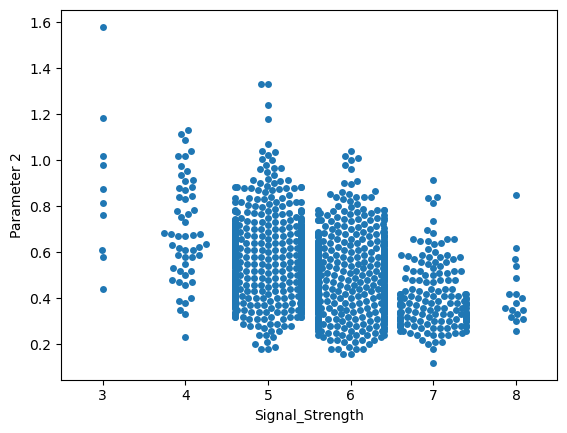

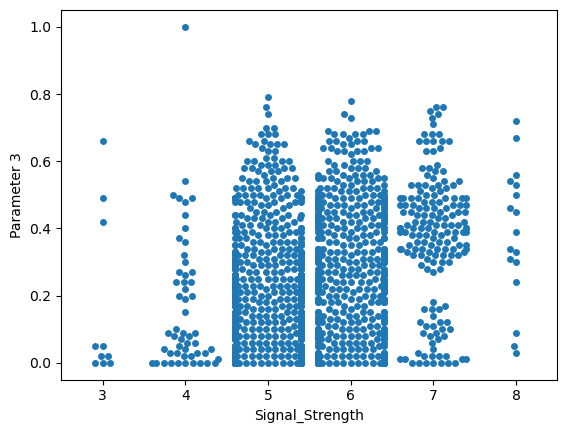

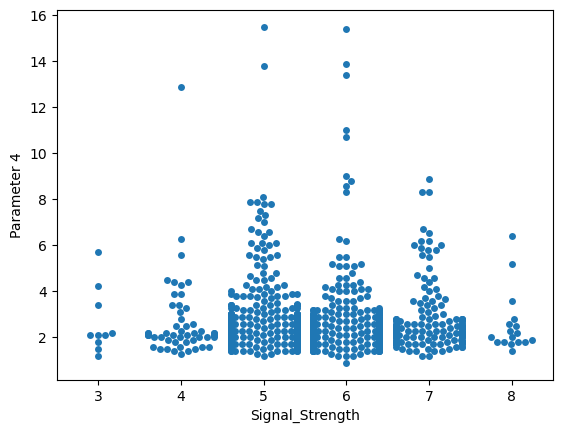

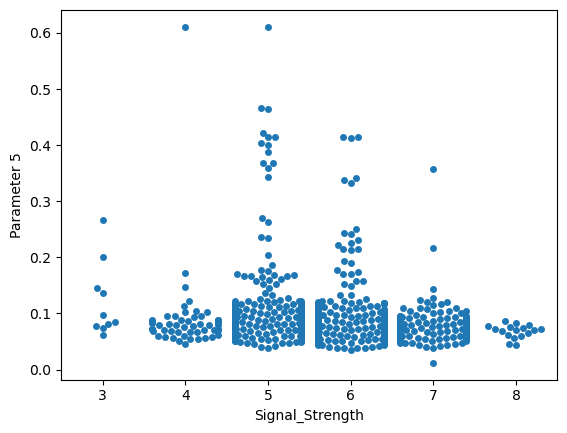

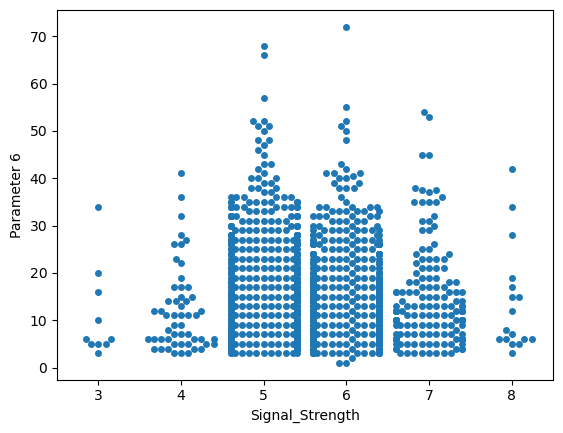

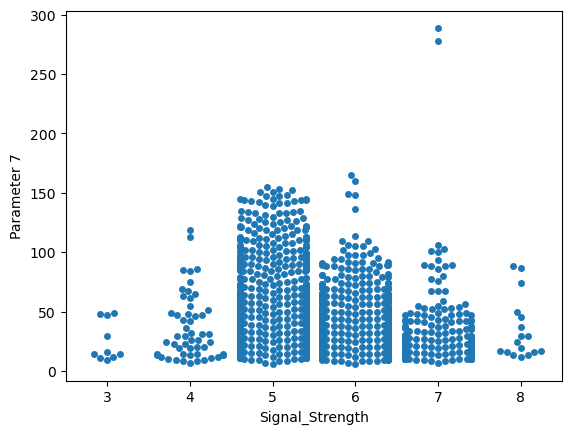

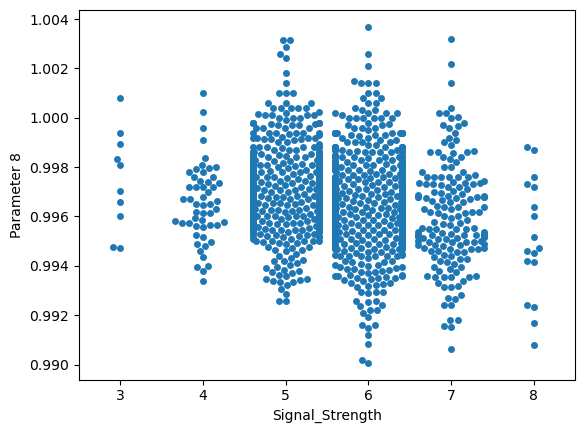

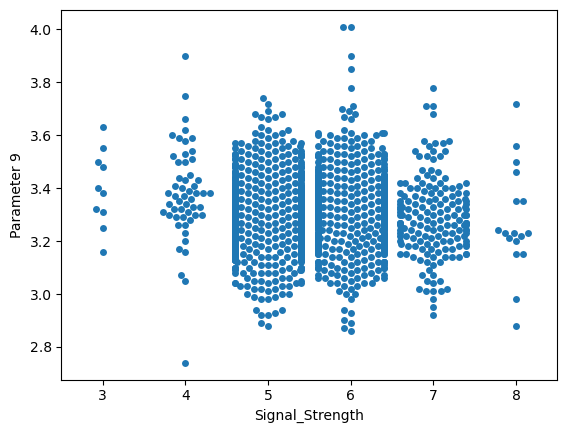

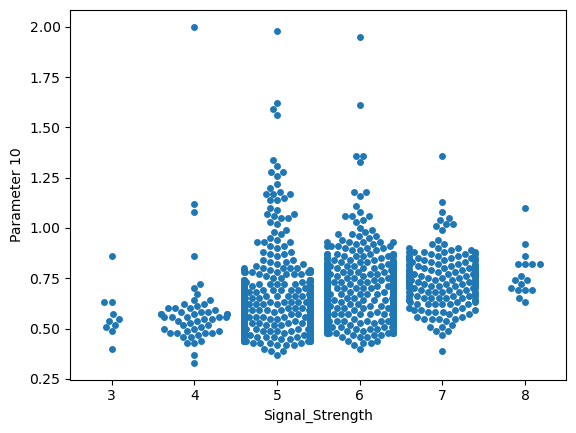

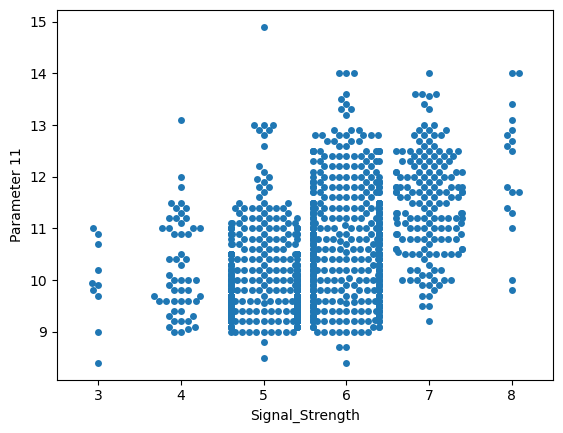

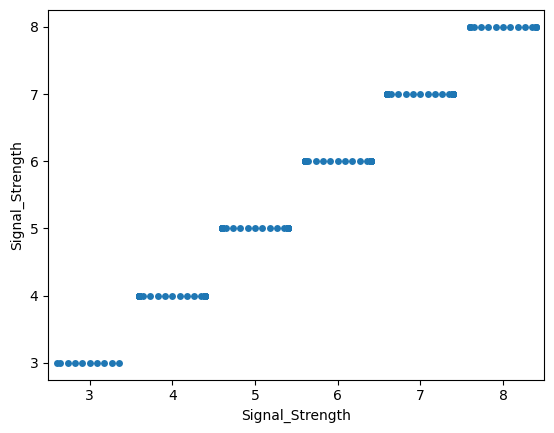

In [15]:
for column in signal.columns:
    sns.swarmplot(signal, x='Signal_Strength', y= signal[column])
    plt.show();

According to the visualization, data has the normal distribution and have high number of values in order of 5, 6 and 7.

Parameters 3, 4, 5, 6, 7 and 10 are highly Right skewed.

Parameters 3,10 and 11 has the high correlation with the signal strength.


In [16]:
# Data preprocessing

X= signal.drop('Signal_Strength', axis=1)
y=signal['Signal_Strength']
print(X.shape)
print(y.shape)

(1359, 11)
(1359,)


In [17]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [18]:
from keras.utils import normalize

In [19]:
#normalizing data
X_trainN= normalize(X_train)
X_testN= normalize(X_test)



In [20]:
from sklearn.preprocessing import OneHotEncoder
y_trainarray= np.array(y_train)
y_testarray= np.array(y_test)
encode= OneHotEncoder()
y_train_encode= encode.fit_transform(y_trainarray.reshape(-1, 1)).toarray()
y_test_encode= encode.transform(y_testarray.reshape(-1,1)).toarray()


# design neural network to train classifier

In [21]:
#optimizer
from keras.optimizers import Adam
adam= Adam(learning_rate=0.005)

In [22]:
#model developement

model= Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu')) #first hidden layer
model.add(Dense(20, activation='relu')) #hidden layer
model.add(Dense(10, activation='relu')) #hidden layer
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax')) #output layer

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936 (3.66 KB)

 Trainable params: 936 (3.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
#fit the model

model_nn = model.fit(X_trainN, y_train_encode,batch_size=32, epochs=40, validation_split=0.2)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5932 - loss: 1.0013 - val_accuracy: 0.5236 - val_loss: 1.0724
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6289 - loss: 0.9145 - val_accuracy: 0.5079 - val_loss: 1.0787
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5819 - loss: 0.9833 - val_accuracy: 0.5236 - val_loss: 1.0791
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5850 - loss: 0.9368 - val_accuracy: 0.5340 - val_loss: 1.0722
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5771 - loss: 0.9775 - val_accuracy: 0.5288 - val_loss: 1.0768
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.9603 - val_accuracy: 0.4817 - val_loss: 1.1334
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5965 - loss: 0.9812 - val_accuracy: 0.4869 - val_loss: 1.0720
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5960 - loss: 0.9844 - val_accuracy: 0.5445 - val_loss:

In [48]:
y_pred= model.predict(X_test)
y_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[2.1903386e-19, 4.2854054e-09, 2.4284238e-01, 7.1928757e-01,
        3.7845545e-02, 2.4490968e-05],
       [0.0000000e+00, 1.3793823e-16, 1.0000000e+00, 7.5810977e-22,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.4876352e-24, 1.1443370e-06,
        9.9999809e-01, 7.8111168e-07],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9353317e-37, 6.1567159e-14, 1.0000000e+00, 9.0231461e-11,
        1.7883736e-30, 0.0000000e+00]], dtype=float32)

In [49]:
model_nn.history

{'accuracy': [0.6026315689086914,
  0.5789473652839661,
  0.5736842155456543,
  0.5736842155456543,
  0.5986841917037964,
  0.6013157963752747,
  0.5907894968986511,
  0.5947368144989014,
  0.5802631378173828,
  0.5736842155456543,
  0.6026315689086914,
  0.5855262875556946,
  0.5697368383407593,
  0.5921052694320679,
  0.5855262875556946,
  0.5763157606124878,
  0.5828947424888611,
  0.5657894611358643,
  0.5789473652839661,
  0.5907894968986511,
  0.5736842155456543,
  0.5789473652839661,
  0.6052631735801697,
  0.5960526466369629,
  0.5881578922271729,
  0.5763157606124878,
  0.6026315689086914,
  0.6118420958518982,
  0.6078947186470032,
  0.5986841917037964,
  0.6052631735801697,
  0.6092105507850647,
  0.6065789461135864,
  0.5947368144989014,
  0.6105263233184814,
  0.5828947424888611,
  0.5855262875556946,
  0.5815789699554443,
  0.61710524559021,
  0.5868421196937561],
 'loss': [0.9721136093139648,
  0.9788710474967957,
  0.9763391613960266,
  0.9527058005332947,
  0.964144408

In [50]:
#Evaluate performance
score= pd.DataFrame(model_nn.history)
score

,accuracy,loss,val_accuracy,val_loss
0,0.602632,0.972114,0.523560,1.072412
1,0.578947,0.978871,0.507853,1.078664
2,0.573684,0.976339,0.523560,1.079054
3,0.573684,0.952706,0.534031,1.072246
4,0.598684,0.964144,0.528796,1.076798
5,0.601316,0.942797,0.481675,1.133378
6,0.590789,0.962597,0.486911,1.072001
7,0.594737,0.955515,0.544503,1.073759
8,0.580263,0.967508,0.476440,1.103318
9,0.573684,0.972201,0.523560,1.086764


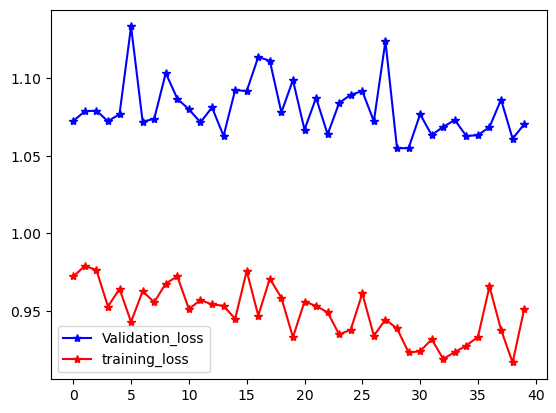

In [51]:
plt.plot(score.val_loss,color='b',marker='*',label='Validation_loss')
plt.plot(score.loss,color='r',marker='*',label='training_loss')
plt.legend()


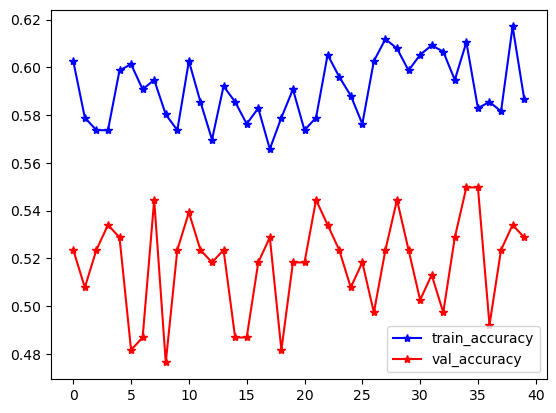

In [52]:
plt.plot(score.accuracy,color='b',marker='*',label='train_accuracy')
plt.plot(score.val_accuracy,color='r',marker='*',label='val_accuracy')
plt.legend()

### DESIGN NEW ARCHITECHTURE

In [53]:
model2= Sequential()
model2.add(Dense(30, input_shape=(X_train.shape[1],), activation='relu')) #first hidden layer
model2.add(Dense(30, activation='relu')) #hidden layer
model2.add(Dense(10, activation='relu')) #hidden layer
model2.add(Dropout(0.40))
model2.add(Dense(6, activation='softmax')) #output layer

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,666 (6.51 KB)

 Trainable params: 1,666 (6.51 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
adam2= Adam(learning_rate=0.001)
model2.compile(optimizer=adam2, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model_nn2= model2.fit(X_trainN, y_train_encode,batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3822 - loss: 1.6661 - val_accuracy: 0.3665 - val_loss: 1.5556
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4409 - loss: 1.5432 - val_accuracy: 0.3665 - val_loss: 1.4579
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4043 - loss: 1.4592 - val_accuracy: 0.3665 - val_loss: 1.3947
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3584 - loss: 1.4416 - val_accuracy: 0.3665 - val_loss: 1.3624
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3881 - loss: 1.3822 - val_accuracy: 0.3665 - val_loss: 1.3381
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3940 - loss: 1.3883 - val_accuracy: 0.4136 - val_loss: 1.3196
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4245 - loss: 1.3324 - val_accuracy: 0.4084 - val_loss: 1.3092
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4305 - loss: 1.3442 - val_accuracy: 0.4712 - val_loss

In [56]:
y_pred2= model2.predict(X_test)
y_pred2

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[6.11673645e-09, 5.43636816e-06, 1.70159504e-01, 8.06721330e-01,
        2.31134314e-02, 2.57811394e-07],
       [1.82274907e-37, 1.78246371e-20, 9.71687436e-01, 2.83125117e-02,
        2.69394777e-13, 7.21657084e-29],
       [1.21675079e-24, 2.93023679e-15, 3.33213285e-02, 9.66669261e-01,
        9.40481459e-06, 5.54708159e-20],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.21471861e-03, 9.97785211e-01,
        5.67015801e-23, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.16599392e-19,
        0.00000000e+00, 0.00000000e+00],
       [3.22528320e-33, 8.36574282e-19, 8.17200467e-02, 9.18279886e-01,
        7.13143677e-09, 1.15260105e-26]], dtype=float32)

In [57]:
score2= pd.DataFrame(model_nn2.history)
score2

,accuracy,loss,val_accuracy,val_loss
0,0.415789,1.638316,0.366492,1.555624
1,0.426316,1.523742,0.366492,1.457873
2,0.405263,1.457072,0.366492,1.394709
3,0.380263,1.435297,0.366492,1.362388
4,0.365789,1.380976,0.366492,1.338140
5,0.407895,1.358440,0.413613,1.319567
6,0.418421,1.343956,0.408377,1.309189
7,0.421053,1.324840,0.471204,1.296009
8,0.411842,1.324134,0.476440,1.286777
9,0.413158,1.300144,0.471204,1.278906


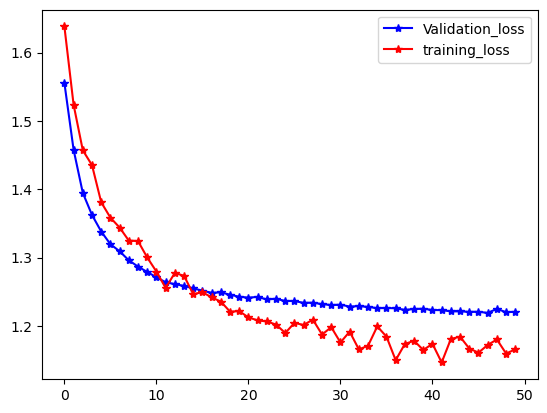

In [58]:
plt.plot(score2.val_loss,color='b',marker='*',label='Validation_loss')
plt.plot(score2.loss,color='r',marker='*',label='training_loss')
plt.legend()

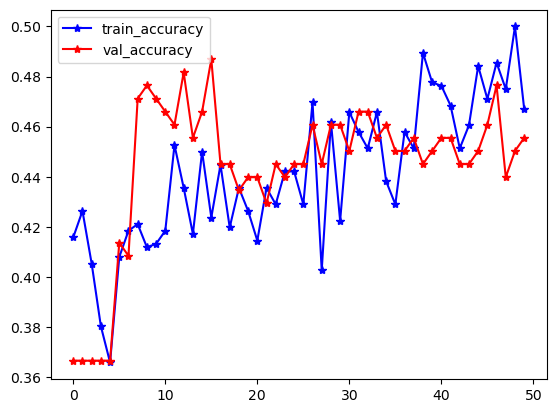

In [59]:
plt.plot(score2.accuracy,color='b',marker='*',label='train_accuracy')
plt.plot(score2.val_accuracy,color='r',marker='*',label='val_accuracy')
plt.legend()

### Data Insights:

- I have changed the learning rate from 0.005 to 0.001 in Adam optimizer
- Also increased my drop out to 40% to check the performance on training and validation score.
- Comparatively, model 1 is performing better than the model 2 from the above visualizations.

#                                                     Part II

## Imaging data for Automatic Vehicles

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


In [61]:
import h5py # to read the file

In [62]:
with h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5",'r') as hdf:
    print(list(hdf.keys()))
    X_train = np.array(hdf.get('X_train'))
    y_train = np.array(hdf.get('y_train'))
    X_test  = np.array(hdf.get('X_test'))
    y_test  = np.array(hdf.get('y_test'))
    X_val   = np.array(hdf.get('X_val'))
    y_val   = np.array(hdf.get('y_val'))  

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [63]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(18000, 32, 32)
(42000, 32, 32)
(18000,)
(42000,)


### X and Y values are in sync.

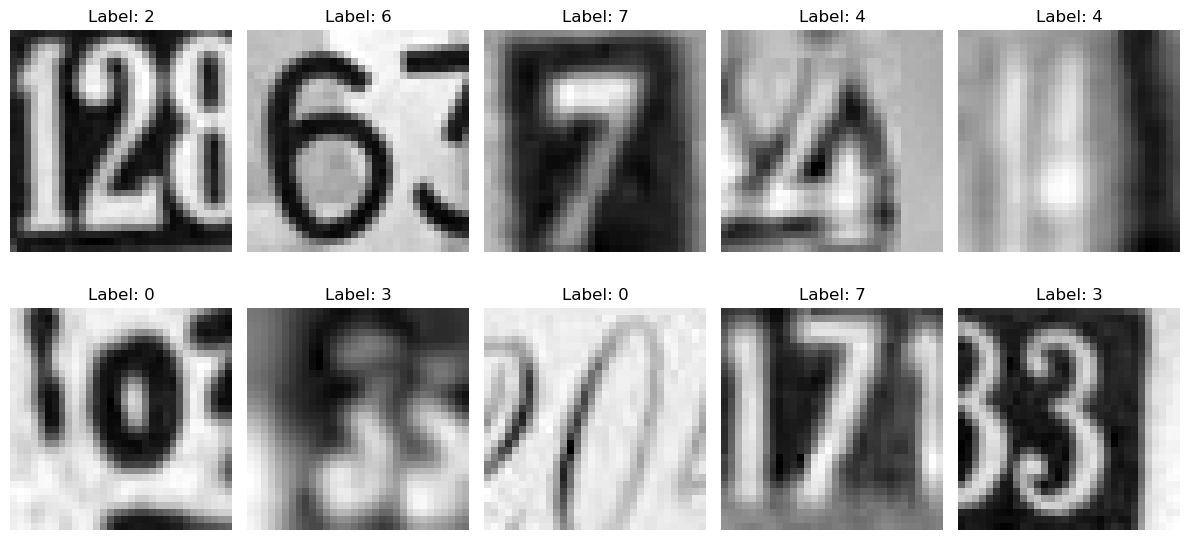

First 10 Images


In [64]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

print('First 10 Images')

In [65]:
#Reshaping

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


In [66]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

float32
float32
uint8
uint8


In [67]:
#We can see y is in 'uint'. So we need to convert it.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [68]:
print(y_train.dtype)
print(y_test.dtype)

float64
float64


In [69]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


In [70]:
number_of_classes = y_train.shape[1]
print("Total number of classes:", number_of_classes)

print("________________________________")

class_counts = pd.value_counts(y_train.argmax(axis=1))
print("Class Counts:") 
print(class_counts)

Total number of classes: 10
________________________________
Class Counts:
3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64


In [71]:
model3= Sequential()
model3.add(Dense(80, input_shape = X_train.shape[1:], activation='relu'))
model3.add(Dense(70, activation='relu'))
model3.add(Dense(60, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(10,activation='softmax'))

In [72]:
from keras.optimizers import SGD
sgd_optimizer = SGD(learning_rate=0.001)
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 80)                  │          82,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 70)                  │           5,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 60)                  │           4,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,070 (367.46 KB)

 Trainable params: 94,070 (367.46 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
image_model = model3.fit(X_train, y_train, batch_size = 200, validation_split=0.2, epochs = 100, verbose = 1)

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0994 - loss: 19.7114 - val_accuracy: 0.0971 - val_loss: 2.3077
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1024 - loss: 2.3020 - val_accuracy: 0.0976 - val_loss: 2.3053
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1053 - loss: 2.3018 - val_accuracy: 0.1058 - val_loss: 2.3033
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1144 - loss: 2.2969 - val_accuracy: 0.1100 - val_loss: 2.2974
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1142 - loss: 2.2931 - val_accuracy: 0.1106 - val_loss: 2.2935
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1137 - loss: 2.2893 - val_accuracy: 0.1081 - val_loss: 2.2940
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1192 - loss: 2.2840 - val_accuracy: 0.1136 - val_loss: 2.2822
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1194 - loss: 2.2768 - val_acc

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2251 - loss: 2.0441 - val_accuracy: 0.2318 - val_loss: 2.0691
Epoch 52/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2286 - loss: 2.0335 - val_accuracy: 0.2440 - val_loss: 2.0171
Epoch 53/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2344 - loss: 2.0199 - val_accuracy: 0.2462 - val_loss: 2.0174
Epoch 54/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2385 - loss: 2.0093 - val_accuracy: 0.2533 - val_loss: 2.0105
Epoch 55/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2443 - loss: 2.0087 - val_accuracy: 0.2502 - val_loss: 2.0180
Epoch 56/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2547 - loss: 1.9934 - val_accuracy: 0.2718 - val_loss: 1.9827
Epoch 57/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2689 - loss: 1.9828 - val_accuracy: 0.2665 - val_loss: 2.0017
Epoch 58/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2680 - loss: 1.9846 - val_accuracy:

In [74]:
y_pred= model3.predict(X_test)
y_pred

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.00501874e-01, 6.46319985e-02, 6.36521950e-02, ...,
        1.91082265e-02, 1.58325389e-01, 3.38506550e-01],
       [1.97863602e-03, 8.19387436e-02, 1.93867356e-01, ...,
        1.36019051e-01, 1.49599519e-02, 1.75385252e-02],
       [3.99238888e-05, 3.72308750e-05, 9.05074835e-01, ...,
        7.39455596e-02, 2.97017425e-04, 1.77106969e-02],
       ...,
       [2.03595613e-03, 2.21339916e-03, 1.21574454e-01, ...,
        8.48125815e-01, 1.22908441e-05, 3.23055824e-03],
       [1.78622097e-01, 1.18458858e-02, 1.11948038e-02, ...,
        7.77800626e-04, 1.00950174e-01, 4.90698993e-01],
       [1.98148154e-02, 1.88875257e-03, 4.96155322e-01, ...,
        9.28898901e-02, 7.24167526e-02, 9.20980349e-02]], dtype=float32)

In [75]:
import pandas as pd
score3 = pd.DataFrame(image_model.history)
print(score3)

    accuracy      loss  val_accuracy  val_loss
0   0.100982  6.445959      0.097143  2.307670
1   0.101756  2.302374      0.097619  2.305319
2   0.106399  2.299838      0.105833  2.303320
3   0.112530  2.296595      0.110000  2.297418
4   0.114851  2.292455      0.110595  2.293527
..       ...       ...           ...       ...
95  0.470982  1.564474      0.438452  1.638964
96  0.473095  1.561999      0.485357  1.576509
97  0.476607  1.555565      0.456071  1.624628
98  0.482887  1.552879      0.487143  1.571617
99  0.486637  1.530249      0.479167  1.599554

[100 rows x 4 columns]


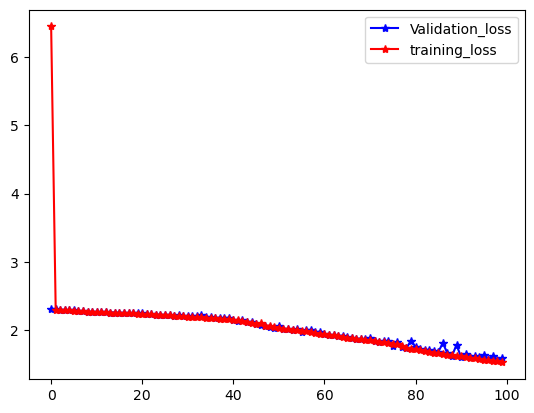

In [76]:
plt.plot(score3.val_loss,color='b',marker='*',label='Validation_loss')
plt.plot(score3.loss,color='r',marker='*',label='training_loss')
plt.legend()

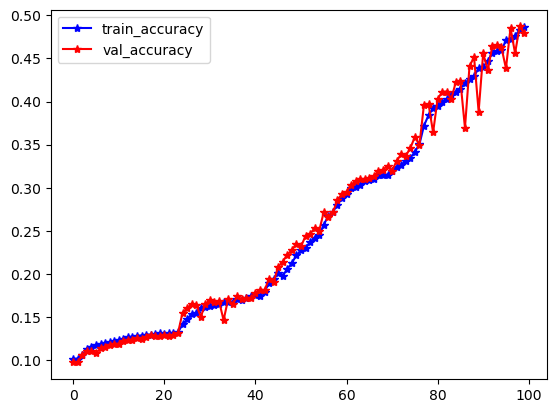

In [77]:
plt.plot(score3.accuracy,color='b',marker='*',label='train_accuracy')
plt.plot(score3.val_accuracy,color='r',marker='*',label='val_accuracy')
plt.legend()

In [78]:
#It seems the model not perform well. Let me try other architechture

model4= Sequential()
model4.add(Dense(120, input_shape = X_train.shape[1:], activation='sigmoid'))
model4.add(Dense(100, activation='sigmoid'))
model4.add(Dense(80, activation='sigmoid'))
model4.add(Dense(50, activation='sigmoid'))
model4.add(Dense(10,activation='softmax'))

In [79]:
from keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.001) 
model4.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 120)                 │         123,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          12,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │           4,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,740 (577.11 KB)

 Trainable params: 147,740 (577.11 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
image_model2 = model4.fit(X_train, y_train, batch_size = 200, validation_split=0.2, epochs = 100, verbose = 1)

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1004 - loss: 2.3222 - val_accuracy: 0.1014 - val_loss: 2.3072
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1005 - loss: 2.3052 - val_accuracy: 0.0974 - val_loss: 2.3049
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1061 - loss: 2.3046 - val_accuracy: 0.1052 - val_loss: 2.3033
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0959 - loss: 2.3048 - val_accuracy: 0.0974 - val_loss: 2.3056
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0965 - loss: 2.3054 - val_accuracy: 0.1010 - val_loss: 2.3041
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0956 - loss: 2.3055 - val_accuracy: 0.1052 - val_loss: 2.3031
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0991 - loss: 2.3045 - val_accuracy: 0.1039 - val_loss: 2.3034
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1004 - loss: 2.3050 - val_accu

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1014 - loss: 2.3031 - val_accuracy: 0.0974 - val_loss: 2.3038
Epoch 52/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1010 - loss: 2.3029 - val_accuracy: 0.0974 - val_loss: 2.3028
Epoch 53/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1047 - loss: 2.3027 - val_accuracy: 0.1010 - val_loss: 2.3031
Epoch 54/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1047 - loss: 2.3029 - val_accuracy: 0.0986 - val_loss: 2.3033
Epoch 55/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1003 - loss: 2.3028 - val_accuracy: 0.1010 - val_loss: 2.3025
Epoch 56/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1005 - loss: 2.3030 - val_accuracy: 0.1014 - val_loss: 2.3027
Epoch 57/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1025 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3032
Epoch 58/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1019 - loss: 2.3030 - val_accuracy:

In [81]:
y_pred4= model4.predict(X_test)
y_pred4

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917],
       [0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917],
       [0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917],
       ...,
       [0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917],
       [0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917],
       [0.09931506, 0.09985691, 0.10125612, ..., 0.09800679, 0.09913043,
        0.10072917]], dtype=float32)

In [82]:
import pandas as pd
score4 = pd.DataFrame(image_model.history)
print(score4)


    accuracy      loss  val_accuracy  val_loss
0   0.100982  6.445959      0.097143  2.307670
1   0.101756  2.302374      0.097619  2.305319
2   0.106399  2.299838      0.105833  2.303320
3   0.112530  2.296595      0.110000  2.297418
4   0.114851  2.292455      0.110595  2.293527
..       ...       ...           ...       ...
95  0.470982  1.564474      0.438452  1.638964
96  0.473095  1.561999      0.485357  1.576509
97  0.476607  1.555565      0.456071  1.624628
98  0.482887  1.552879      0.487143  1.571617
99  0.486637  1.530249      0.479167  1.599554

[100 rows x 4 columns]


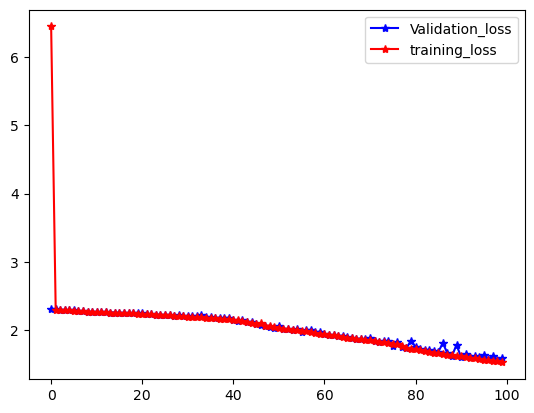

In [84]:
plt.plot(score4.val_loss,color='b',marker='*',label='Validation_loss')
plt.plot(score4.loss,color='r',marker='*',label='training_loss')
plt.legend()

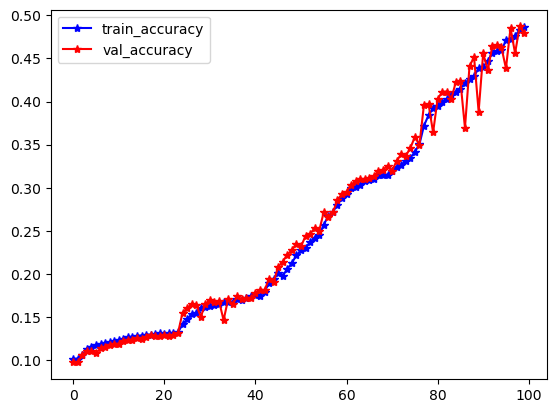

In [85]:
plt.plot(score4.accuracy,color='b',marker='*',label='train_accuracy')
plt.plot(score4.val_accuracy,color='r',marker='*',label='val_accuracy')
plt.legend()

# Conclusion:

In above models, I have tried various number of hidden layer points and activation funtions such as ReLu and Sigmoid. 
I have tried with SGD, Adam optimizers. Still I could see that the results are more or less same to all.

To optimize this model more better, I need to check with Batch normalization and Weight initializers and all.

###  ------------------------------------- Thank you ----------------------------------------